In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import cv2 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

from pyriemann.clustering import Kmeans

In [2]:
data = pd.read_csv('tb2_data_clean_3.csv', sep=';')
data.head()

,MMSI,LAT,LON,TIMESTAMP
0,677054700,1.216667,103.618333,1621910431
1,677054700,1.216667,103.616667,1621909889
2,677054700,1.217755,103.618347,1621909243
3,677054700,1.217748,103.618327,1621908342
4,677028400,1.302933,103.616900,1621911351


In [3]:
data = data.iloc[:,1:3]
data

,LAT,LON
0,1.216667,103.618333
1,1.216667,103.616667
2,1.217755,103.618347
3,1.217748,103.618327
4,1.302933,103.616900
...,...,...
162200,1.305877,103.614833
162201,1.305882,103.614830
162202,2.202430,102.195437
162203,2.202423,102.195440


In [4]:
data.values

array([[  1.21666667, 103.6183333 ],
       [  1.21666667, 103.6166667 ],
       [  1.217755  , 103.6183467 ],
       ...,
       [  2.20243   , 102.1954367 ],
       [  2.20242333, 102.19544   ],
       [  2.20242667, 102.195435  ]])

In [5]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data.values)
    Sum_of_squared_distances.append(km.inertia_)

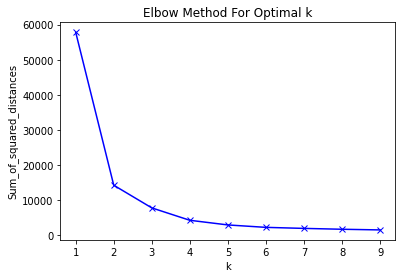

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
k_means = KMeans(n_clusters=5)
k_means.fit(data.values)
clusters = k_means.fit_predict(data.values)

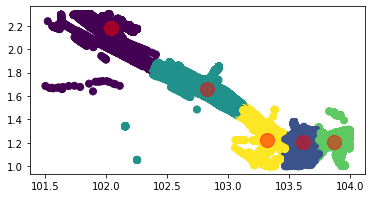

In [18]:
plt.scatter(data.values[:, 1], data.values[:, 0], c=clusters, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.5);
plt.gca().set_box_aspect(0.5)

In [6]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return distances

distances = []
for i, (cx, cy) in enumerate(centers):
    print(i, cx, cy)
    mean_distance = k_mean_distance(data.values, cx, cy, i, clusters)
    distances.append(mean_distance)
    print(min(distances[i]))
    print(max(distances[i]))
    print('-----------------------------------')

0 1.9690845138456896 102.36195861527631
0.0158021590968657
0.921976339502322
-----------------------------------
1 1.218432309548405 103.60062061169981
0.0004400457079514676
0.7294160118640517
-----------------------------------


In [7]:
jarak = pd.DataFrame(distances[0])


# scaling data
mms = MinMaxScaler()
mms.fit(jarak)
print(mms.data_min_)
print(mms.data_max_)
jarak_scaled = mms.transform(jarak)
print(jarak_scaled.min())
print(jarak_scaled.max())

[0.01580216]
[0.92197634]
0.0
0.9999999999999999


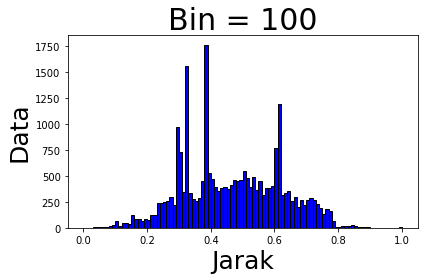

array([1.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 7.000e+00,
       1.100e+01, 5.000e+00, 1.800e+01, 2.700e+01, 6.700e+01, 1.900e+01,
       4.800e+01, 4.800e+01, 4.100e+01, 1.200e+02, 8.200e+01, 8.600e+01,
       6.700e+01, 8.600e+01, 7.800e+01, 1.250e+02, 1.270e+02, 2.350e+02,
       2.370e+02, 2.470e+02, 2.620e+02, 2.990e+02, 2.210e+02, 9.720e+02,
       7.270e+02, 3.410e+02, 1.556e+03, 3.380e+02, 2.810e+02, 2.560e+02,
       2.830e+02, 4.470e+02, 1.761e+03, 5.280e+02, 4.660e+02, 3.910e+02,
       3.570e+02, 3.820e+02, 3.880e+02, 3.760e+02, 4.120e+02, 4.570e+02,
       4.520e+02, 4.600e+02, 5.470e+02, 4.830e+02, 3.880e+02, 4.860e+02,
       3.630e+02, 4.490e+02, 3.190e+02, 3.810e+02, 3.810e+02, 4.000e+02,
       7.690e+02, 1.186e+03, 3.110e+02, 3.380e+02, 3.520e+02, 2.610e+02,
       2.970e+02, 1.980e+02, 2.670e+02, 2.180e+02, 2.710e+02, 2.870e+02,
       2.680e+02, 2.240e+02, 1.890e+02, 1.300e+02, 1.770e+02, 1.620e+02,
       6.700e+01, 6.000e+00, 4.000e+00, 1.600e+01, 

In [42]:
binwidth = 100

ax = plt.subplot(111)
hist = ax.hist(jarak_scaled, bins = binwidth,
             color = 'blue', edgecolor = 'black')
ax.set_title('Bin = %d' % binwidth, size = 30)
ax.set_xlabel('Jarak', size = 25)
ax.set_ylabel('Data', size= 25)

plt.tight_layout()
plt.show()
hist[0]

In [9]:
jarak_scaled

array([[0.26471822],
       [0.29781902],
       [0.29782862],
       ...,
       [0.29891361],
       [0.29890551],
       [0.29891171]])

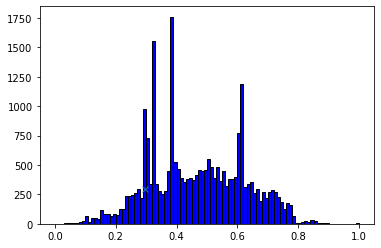

array([0.26471822, 0.29781902, 0.29782862, ..., 0.29891361, 0.29890551,
       0.29891171])

In [39]:
x = jarak_scaled.flatten()
peaks, _ = find_peaks(x, height=0, distance=1000)
plt.hist(x, bins = binwidth,
             color = 'blue', edgecolor = 'black')
#plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.plot(x[2], 300, 'x')
plt.show()
x

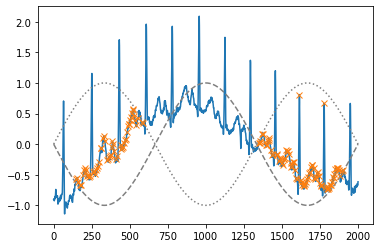

In [16]:
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()